# Analyzing borrowers’ risk of defaulting

Project description
Your project is to prepare a report for a bank's loan division. You'll need to find out if a customer's marital status and number of children have an impact on whether they will default on a loan. The bank already has some data on customers' credit worthiness.
Your report will be considered when building a credit score for a potential customer. A credit score is used to evaluate the ability of a potential borrower to repay their loan.

Instructions for completing the project

Step 1 . Open the data file /datasets/credit_scoring_eng.csvand have a look at the general information.

Step 2 . Preprocess the data:
Identify and fill in missing values
Replace the real number data type with the integer type
Delete duplicate data
Categorize the data
Be sure to explain:
Which missing values ​​you identified
Possible reasons these missing values ​​were present
Which method you used to fill in missing values
Which method you used to find and delete duplicate data and why
Possible reasons why duplicate data was present
Which method you used to change the data type and why
Which dictionaries you've selected for this dataset and why
The data may contain artifacts, or values ​​that do not correspond to reality (for instance, a negative number of days employed). This kind of thing happens when you're working with real data. You need to describe the possible reasons such data may have turned up and process it.

Step 3. Answer these questions:
Is there a connection between having kids and repaying a loan on time?
Is there a connection between marital status and repaying a loan on time?
Is there a connection between income level and repaying a loan on time?
How do different loan purposes affect on-time loan repayment?
Interpret your answers. Explain what the results you obtained mean.

Step 4. Write an overall conclusion.

Description of the data

children: the number of children in the family

days_employed: how long the customer has been working

dob_years: the customer's age

education: the customer's education level

education_id: identifier for the customer's education

family_status: the customer's marital status

family_status_id: identifier for the customer's marital status

gender: the customer's gender

income_type: the customer's income type

debt: whether the customer has ever defaulted on a loan

total_income: monthly income

purpose: reason for taking out a loan

### Step 1. Data overview

Let's import libraries, download data and have first look at it.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
try:
    df=pd.read_csv('datasets/credit_scoring_eng.csv')
except:
    df=pd.read_csv('C:\Asia\PROJECTS\credit_scoring_eng.csv')

In [3]:
# Let's see how many rows and columns our dataset has
df.shape

(21525, 12)

In [4]:
df.size

258300

In [5]:
# let's print the first N rows
df.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [6]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


So the data contains 21525 rows and 12 columns.

All parameters have the right data type.

2 columns have missing values: 'days_employed' and 'total_income'. It's interesting that these columns have the same amount of missing values(2174).  Let's check if it is the same rows have missing values in columns 'days_employed' and 'total_income'.



In [7]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
df['days_employed'].isna().sum()
df['total_income'].isna().sum()
df.loc[(df['days_employed'].isna() & df['total_income'].isna())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Yes, the number of rows in the filtered table match the number of missing values, so we can make a conclusion that we don't have an information about days employed and total income of the same clients.

Let's calculate the percentage of the missing values compared to the whole dataset. 

In [8]:
# % of missing values in data
mis_val = (df['days_employed'].isna().sum())/ len(df) * 100
print(f"Percentage of missing values: {mis_val:.2f}%")

Percentage of missing values: 10.10%


 We have 10% missing values in our dataset. It is quite a lot percentage of client's. Let's try to understand who are these people. We can make an asssumption that there is a reason why these people didn't answered these question, maybe they have 
something common. The very first that we wan't to check is the income type. Clients might omitted answering about their
total income and how many days they've been employed because they are retiered, students, people on paternity / maternity 
leave, unemployed or just start to work in a new place.

In [9]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values

filtred_df = df.loc[(df['days_employed'].isna() & df['total_income'].isna())]

print(filtred_df['income_type'].unique())

['retiree' 'civil servant' 'business' 'employee' 'entrepreneur']


In [10]:
filtred_df['income_type'].value_counts(normalize = True)



employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

In [11]:
# Checking the distribution in the whole dataset
df['income_type'].value_counts(normalize = True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

As we can see, our assuption was wrong. Half of the missing values belong to employees, 23% - to businesmen and
just 19% retired people didn't answered questions about days of employed and total income. Also there are any students,
people on paternity / maternity leave, unemployed or people who just start to work in a new place. So our hypothesis was
not confirmed.
The distribution in the original dataset is similar to the distribution of the filtered table. So we can consider to use income type data to deal with our missing values.

The next assumption that worth to check - is there any corelation between our missing values and gender. 
Probably, male respondents more secretive than female.

In [12]:
# Check for other reasons and patterns that could lead to missing values
filtred_df = df.loc[(df['days_employed'].isna() & df['total_income'].isna())]
filtred_df['gender'].value_counts(normalize = True)
df['gender'].value_counts(normalize = True)


F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

There are more women than men among the clients who did missing values in our study, but it is also true for original 
dataset, distributions are similar. So there are no connection between our missing values and gender.
The last reason that can explain our missing values could be age of the clients. Let's create 5 age groups and check how they answered the questions about days of employed and total_income.

In [13]:
# Checking for other patterns - explain which
def age_categories(dob_years):
    if dob_years <30:
        return '20-30 years'
    if dob_years >=30 and dob_years <40:
        return '30-39 years'
    if dob_years >=40 and dob_years <50:
        return '40-49 years'
    if dob_years >=50 and dob_years <60:
        return '50-59 years'
    
    return '60+ yers'
df['age_categories'] = df['dob_years'].apply(age_categories)
print(df['age_categories'].value_counts(normalize = True))

30-39 years    0.263600
40-49 years    0.249524
50-59 years    0.217375
20-30 years    0.152567
60+ yers       0.116934
Name: age_categories, dtype: float64


In [14]:
filtred_df = df.loc[df['days_employed'].isna() & df['total_income'].isna()]

print(filtred_df['age_categories'].value_counts(normalize = True))

30-39 years    0.259890
40-49 years    0.247010
50-59 years    0.230451
20-30 years    0.142134
60+ yers       0.120515
Name: age_categories, dtype: float64


As we see, the age of a clients also don't clarified the reason of our missing values.
 
 Maybe values in these 2 columns are missing because of some technical problems. It is very suspicious that values are missing in columns 'days employed' and 'total income' in the same rows. But we have not enough information to confirm our assumption. We might investigate the date and time of loading the data. Now we can't do it but we still need to do something with our missing values. Perhaps the income type should be used to restore missing data, we'll do it further. 

## Data transformation

Let's have a look at our data column bu column.

In [15]:
# Let's see all values in education column to check if and what spellings will need to be fixed
print(df['education'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


The column 'education' has values written in the different ways. Let's unify them.

In [16]:
# Fix the registers if required
df['education']= df['education'].str.lower()

In [17]:
# Checking all the values in the column to make sure we fixed them

print(df['education'].unique())


["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']


Now the work with this column will be easier.


Let's check the data in the `children` column

In [18]:
# Let's see the distribution of values in the `children` column
print(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


There are obviously couple typos in our dataset. It couldn't be -1 child either it doubtful that 76 clients have 20 children.
We think that it should be 1 chaild instead -1 and 2 children instead 20

In [19]:
# [fix the data based on your decision]
df['children']=df['children'].replace(-1, 1)
df['children']=df['children'].replace(20, 2)

In [20]:
# Checking the `children` column again to make sure it's all fixed
df['children'].value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

The column 'children' now looks fine. Let's go further, to the column 'days_employed'

In [21]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

 Oh...At least 75% values are negative. Let's look deeply. 

In [22]:
df.shape

(21525, 13)

In [23]:
# Address the problematic values, if they exist

negative_days = df[df['days_employed'] < 0]
high_days = df[df['days_employed'] > 20000]

In [24]:
# Check the result - make sure it's fixed
problematic_pct = (len(negative_days) + len(high_days)) / len(df) * 100
print(f"Percentage of problematic data in 'days_employed' column: {problematic_pct:.2f}%")

Percentage of problematic data in 'days_employed' column: 89.90%


89% of our data is problematic. It is too much, we couldn't drop it without damaging our data. We can take modulo values to continue our analyse.
 

In [25]:
df['days_employed'] = df['days_employed'].abs()
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

Let's now look at the client's age and whether there are any issues there. 

In [26]:
df['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

As we can see, there are 0 values in column with client's age. Let's calculate what is the percentages of 0 values in our data.

In [27]:
print(f"Percentage of customers with 0 age is {(df['dob_years']==0).sum()/len(df) :.2%}")

Percentage of customers with 0 age is 0.47%


Less then 1% customers have 0 in the age column. We can drope them without regret.

In [28]:
# Address the issues in the `dob_years` column, if they exist
df.drop(df.loc[df['dob_years']==0].index, inplace=True)

In [29]:
# Check the result - make sure it's fixed
df['dob_years'].describe()

count    21424.000000
mean        43.497479
std         12.246934
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Yes, we did everythin correct, the youngest customer in our data is 19 years old.

Now let's check the `family_status` column. See what kind of values there are and what problems we might have.

In [30]:
# Let's see the values for the column
df['family_status'].unique()
df['family_status'].value_counts()


married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

We don't see any problematic values

Now let's check the `gender` column. 

In [31]:
# Let's see the values in the column
df['gender'].unique()
df['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

Gender column has value 'XNA' that is not Male or Female. We have just 1 such value, we can drop it to make data cleaner.

In [32]:
# Address the problematic values, if they exist
df.drop(df.loc[df['gender']=='XNA'].index, inplace=True)

In [33]:
# Check the result - make sure it's fixed
df['gender'].unique()
df['gender'].value_counts()

F    14164
M     7259
Name: gender, dtype: int64

It looks better now.

Now let's check the `income_type` column. See what kind of values there are and what problems we may need to address.

In [34]:
# Let's see the values in the column
df['income_type'].unique()
df['income_type'].value_counts()

employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

I don't see any. Only categories 'entrepreneur', 'student', 'paternity / maternity leave' might make a problem because too
few of them and that is not enough for analysis. But it is not a problem in this case, we can leave these rare classes.

In [35]:
df['total_income'].describe()

count     19259.000000
mean      26794.133121
std       16494.347322
min        3306.762000
25%       16494.864000
50%       23200.877000
75%       32536.052000
max      362496.645000
Name: total_income, dtype: float64

# Address the problematic values, if they exist


Now let's see if we have any duplicates in our data.

In [36]:
# Checking duplicates
df.duplicated().sum()

71

In [37]:
display(df[df.duplicated()].head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_categories
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family,40-49 years
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding,50-59 years
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony,30-39 years
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony,60+ yers
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding,50-59 years


We have 71 duplicates and we will droped them to make data purer.

In [38]:
# Address the duplicates, if they exist
df=df.drop_duplicates().reset_index()

In [39]:
# Last check whether we have any duplicates
print(df.duplicated().sum())

0


In [40]:
# Check the size of the dataset that you now have after your first manipulations with it
df.size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21352 non-null  int64  
 1   children          21352 non-null  int64  
 2   days_employed     19259 non-null  float64
 3   dob_years         21352 non-null  int64  
 4   education         21352 non-null  object 
 5   education_id      21352 non-null  int64  
 6   family_status     21352 non-null  object 
 7   family_status_id  21352 non-null  int64  
 8   gender            21352 non-null  object 
 9   income_type       21352 non-null  object 
 10  debt              21352 non-null  int64  
 11  total_income      19259 non-null  float64
 12  purpose           21352 non-null  object 
 13  age_categories    21352 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.3+ MB


After droping duplicates and typos we have 21352 enteries, so we left 99% of data. But we still have missing values in two columns. It is time to deal with it.

# Working with missing values

### Restoring missing values in `total_income`

Now it is time to deal with missing values in total_income and days_employed columns. Let's create a table without missing values. This data will be used to restore the missing values.

In [41]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
df_without_mv= df.dropna()
df_without_mv.head()

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_categories
0,0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49 years
1,1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39 years
2,2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39 years
3,3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39 years
4,4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59 years


 Our goal is to restore missing data with the average meanings of a specific class of another column. Let's think about the factors on which income usually depends. Income usually depends on education, age and the type of employment so we'll invistigate these factors. Let's calculate means and medians of total income for all these factors.

In [42]:
# Look at the mean values for income based on your identified factors
df_without_mv.groupby('age_categories')['total_income'].mean()

age_categories
20-30 years    25531.501098
30-39 years    28312.479963
40-49 years    28551.375635
50-59 years    25811.700327
60+ yers       23021.639994
Name: total_income, dtype: float64

In [43]:
# Look at the median values for income based on your identified factors
df_without_mv.groupby('age_categories')['total_income'].median()

age_categories
20-30 years    22735.9110
30-39 years    24667.5280
40-49 years    24764.2290
50-59 years    22203.0745
60+ yers       19761.4250
Name: total_income, dtype: float64

In [44]:
df_without_mv.groupby('income_type')['total_income'].mean()

income_type
business                       32397.307219
civil servant                  27361.316126
employee                       25824.679592
entrepreneur                   79866.103000
paternity / maternity leave     8612.661000
retiree                        21939.310393
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64

In [45]:
df_without_mv.groupby('income_type')['total_income'].median()

income_type
business                       27563.0285
civil servant                  24083.5065
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18969.1490
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

In [46]:
df_without_mv.groupby('education')['total_income'].mean()

education
bachelor's degree      33172.428387
graduate degree        27960.024667
primary education      21144.882211
secondary education    24600.353617
some college           29035.057865
Name: total_income, dtype: float64

In [47]:
df_without_mv.groupby('education')['total_income'].median()

education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21839.4075
some college           25608.7945
Name: total_income, dtype: float64

Means are slightly greater than medians for all factors, this occurs because the data is skewed towards lower values.
Let's draw graphs of correlation of total income from the studied factors. It helps us to choose the right average meaning.

In the next step we will look at thier distribution. The best option to do that is to draw the graphs.

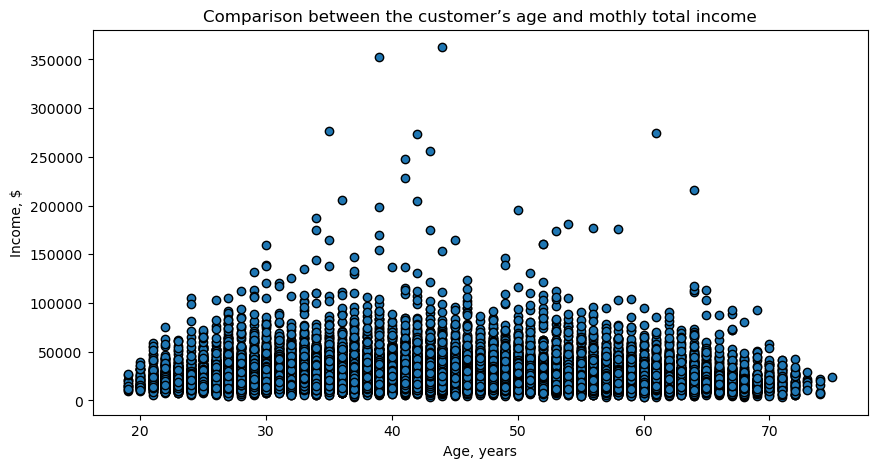

In [48]:
plt.figure(figsize=(10, 5))
plt.title('Comparison between the customer’s age and mothly total income')
plt.scatter (df['dob_years'], df['total_income'], edgecolor='black')
plt.xlabel('Age, years')
plt.ylabel('Income, $')
plt.show()

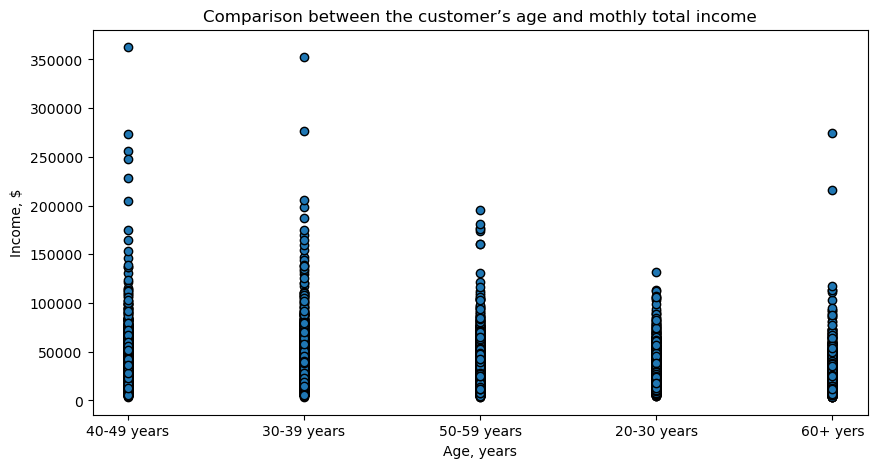

In [49]:
plt.figure(figsize=(10, 5))
plt.title('Comparison between the customer’s age and mothly total income')
plt.scatter (df['age_categories'], df['total_income'], edgecolor='black')
plt.xlabel('Age, years')
plt.ylabel('Income, $')
plt.show()

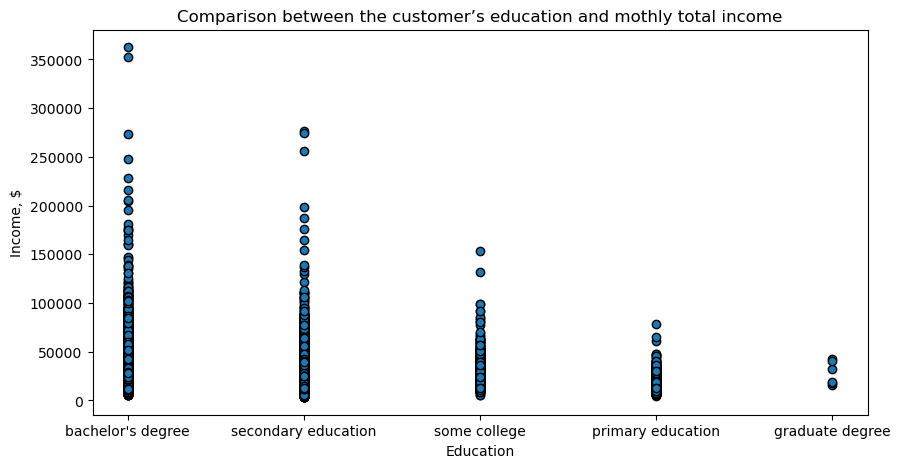

In [50]:
plt.figure(figsize=(10, 5))
plt.title('Comparison between the customer’s education and mothly total income')
plt.scatter (df['education'], df['total_income'], edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Income, $')
plt.show()

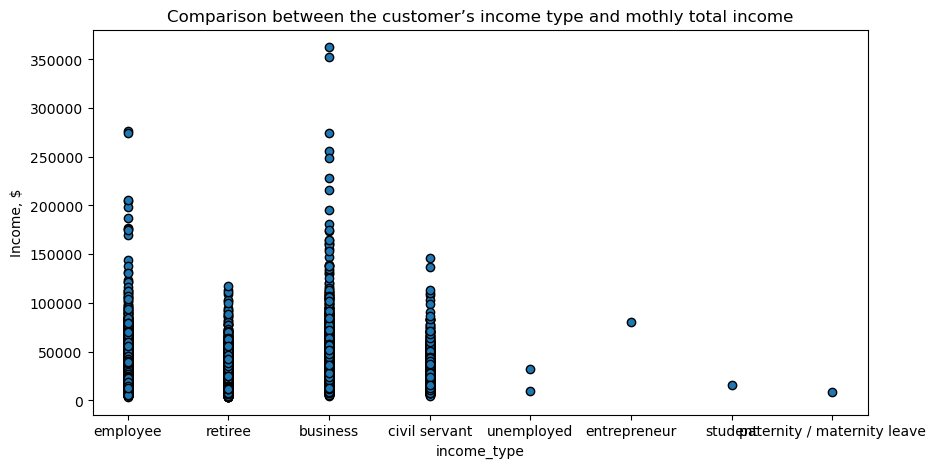

In [51]:
plt.figure(figsize=(10, 5))
plt.title('Comparison between the customer’s income type and mothly total income')
plt.scatter (df['income_type'], df['total_income'], edgecolor='black')
plt.xlabel('income_type')
plt.ylabel('Income, $')
plt.show()

According to the graph above, we can see some logic in the correlation between income type and total income: the highest income have businessmen, then employee and the lowest- civil servants and retirees. We will use this factor to restore our missing values. The data is scattered so we prefer to use median.

In [52]:
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

In [53]:
# Check if we got any errors
df['total_income'].isna().sum()

0

We don't have missing values in total_income column now.

###  Restoring values in `days_employed`

Let's conduct the same research to the one we'd done when were restoring data in a previous column. In our opinion, the main factor that might have correlation with days of the employment is age. Let's calculate means and medians of days of employment for this factor.

In [54]:
# Distribution of `days_employed` medians based on your identified parameters
df_without_mv.groupby('age_categories')['days_employed'].mean()

age_categories
20-30 years      2082.398127
30-39 years      4155.029251
40-49 years     12383.580460
50-59 years    132907.545543
60+ yers       286544.143436
Name: days_employed, dtype: float64

In [55]:
df_without_mv.groupby('age_categories')['days_employed'].median()

age_categories
20-30 years       998.961907
30-39 years      1601.784231
40-49 years      2111.489906
50-59 years      4796.767897
60+ yers       355229.618218
Name: days_employed, dtype: float64

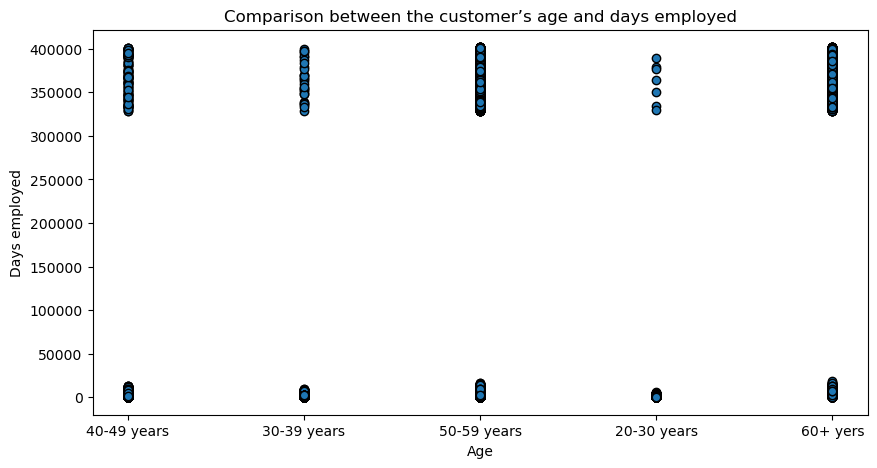

In [56]:
plt.figure(figsize=(10, 5))
plt.title('Comparison between the customer’s age and days employed')
plt.scatter (df['age_categories'], df['days_employed'], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Days employed')
plt.show()

The data is scattered so we prefer to use median also in this case.

In [57]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
df['days_employed'] = df['days_employed'].fillna(df.groupby('age_categories')['days_employed'].transform('median'))

In [58]:
df['days_employed'].isna().sum()

0

In [59]:
# Check the entries in all columns - make sure we fixed all missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21352 non-null  int64  
 1   children          21352 non-null  int64  
 2   days_employed     21352 non-null  float64
 3   dob_years         21352 non-null  int64  
 4   education         21352 non-null  object 
 5   education_id      21352 non-null  int64  
 6   family_status     21352 non-null  object 
 7   family_status_id  21352 non-null  int64  
 8   gender            21352 non-null  object 
 9   income_type       21352 non-null  object 
 10  debt              21352 non-null  int64  
 11  total_income      21352 non-null  float64
 12  purpose           21352 non-null  object 
 13  age_categories    21352 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.3+ MB


Finally we got rid of missing values!

## Categorization of data

Categorization of data is important stage in Preprocessing. In the project the first step-by-step processing covers the text data; the second one addresses the numerical data that needs to be categorized. 
For text data categorization we choose column 'purpose', let's look what do we have here.

In [60]:
# Print the values for your selected data for categorization
df['purpose']

0          purchase of the house
1                   car purchase
2          purchase of the house
3        supplementary education
4              to have a wedding
                  ...           
21347       housing transactions
21348          purchase of a car
21349                   property
21350          buying my own car
21351               to buy a car
Name: purpose, Length: 21352, dtype: object

In [61]:
# Check the unique values
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

 Let's take a look the unique values in the category 'purpose'. We can summorize that the main purpose of getting money 
are: to buy a house, a car, for wedding and education. We will categorize all purposes by this 4 main values.

In [63]:
# Let's write a function to categorize the data based on common topics

def purpose_group(purpose):
    list_words= purpose.split(' ')
    if 'house' in list_words or 'estate' in list_words or 'renting' in list_words or 'property' in list_words or 'housing' in list_words:
        purpose = 'to buy a house'
    elif 'car' in list_words or 'cars' in list_words:
        purpose = 'to buy a car'
    elif 'university' in list_words or 'education' in list_words or 'educated' in list_words:
        purpose = 'to pay for education'
    elif 'wedding'in list_words:
        purpose = 'for wedding'
    else:
        purpose = 'other'
    return purpose
df['clean_purpose'] = df['purpose'].apply(purpose_group)
print(df['clean_purpose'].value_counts())

to buy a house          10763
to buy a car             4284
to pay for education     3995
for wedding              2310
Name: clean_purpose, dtype: int64


We did a good categorization, all purposes are included, there are no purposes in 'other'. No we can work with this column. The most popular purpose of takink a loan is to buy a house, almost half of the customers choose this reason. Clients are least likely to take out a loan for a wedding.

Let's do numerical categorization for column 'children'.

In [64]:
# Looking through all the numerical data in your selected column for categorization
df['children'].value_counts()

0    14021
1     4839
2     2114
3      328
4       41
5        9
Name: children, dtype: int64

In [65]:
# Getting summary statistics for the column

df['children'].describe()

count    21352.000000
mean         0.480517
std          0.755846
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

 There are 2 pretty big group of clients, who have no children and who have 1 child. Other respondents have 2,3,4 or 5 children but the amount of answers in each group is too small for analyse so we'll groupe it into a one with name 'more than 1 child'.

In [66]:
# Creating function for categorizing into different numerical groups based on ranges

def quantity_children(children):
    if children == 0:
        return 'no children'
    if children == 1:
        return '1 child'
    return 'more than 1 child' 

In [67]:
# Creating column with categories
df['quantity_children'] = df['children'].apply(quantity_children)

In [68]:
# Count each categories values to see the distribution
print(df['quantity_children'].value_counts(normalize = True))

no children          0.65666
1 child              0.22663
more than 1 child    0.11671
Name: quantity_children, dtype: float64


In [69]:
df['quantity_children'].value_counts()

no children          14021
1 child               4839
more than 1 child     2492
Name: quantity_children, dtype: int64
0    19619
1     1733
Name: debt, dtype: int64


The vast majority of those who take out loans are childless.

## Checking the Hypotheses


The Hypothesis 1: **Is there a correlation between having children and paying back on time?**
Let's check it.

In [70]:
df_children = df.groupby(['quantity_children','debt'], as_index=False).size()

rate=df_children.pivot_table(index='quantity_children', columns='debt', values='size', aggfunc='sum')
rate['default_rate']=rate[1]/(rate[0]+rate[1])*100

In [71]:
display(rate)

debt,0,1,default_rate
quantity_children,,,
1 child,4397,442,9.134119
more than 1 child,2259,233,9.349920
no children,12963,1058,7.545824


Conclusion: Yes, there is a correlation between having children and paying back on time. Childless people pay thier debts back better than clients who have at least 1 child.

The Hypothesis 2: **Is there a correlation between family status and paying back on time?**

In [72]:
# Check the family status data and paying back on time

df_family = df.groupby(['family_status','debt'], as_index=False).size()

rate_fam=df_family.pivot_table(index='family_status', columns='debt', values='size', aggfunc='sum')
print (rate_fam)

# Calculating default-rate based on family status

rate_fam['default_rate_family']=rate_fam[1]/(rate_fam[0]+rate_fam[1])*100
print(rate_fam)



debt                   0    1
family_status                
civil partnership   3743  386
divorced            1100   85
married            11363  927
unmarried           2521  273
widow / widower      892   62
debt                   0    1  default_rate_family
family_status                                     
civil partnership   3743  386             9.348511
divorced            1100   85             7.172996
married            11363  927             7.542718
unmarried           2521  273             9.770938
widow / widower      892   62             6.498952


Conclusion: Yes, there is a correlation between family status and paying back on time. Widows and widower pay thier debts better than all other clients.The most unreliable payers are unmarried clients. 

The Hypothesis 3: **Is there a correlation between income level and paying back on time?**

In [73]:
df['total_income'].describe()

count     21352.000000
mean      26457.353168
std       15727.807234
min        3306.762000
25%       17223.821250
50%       22815.103500
75%       31325.403250
max      362496.645000
Name: total_income, dtype: float64

In [74]:
q = df['total_income'].describe()

df['income_group'] = pd.cut(x=df['total_income'], bins=[q['min'], q['25%'], q['50%'], q['75%'], q['max']],
                    labels=['low income', 'average_income', 'above_average_incom',
                            'high_income'])
inc_gr = df.groupby(['income_group']).count()
display(inc_gr)

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_categories,clean_purpose,quantity_children
income_group,,,,,,,,,,,,,,,,
low income,5337,5337,5337,5337,5337,5337,5337,5337,5337,5337,5337,5337,5337,5337,5337,5337
average_income,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452,5452
above_average_incom,5224,5224,5224,5224,5224,5224,5224,5224,5224,5224,5224,5224,5224,5224,5224,5224
high_income,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338


In [75]:
# Check the income level data and paying back on time

df_income = df.groupby(['income_group','debt'], as_index=False).size()

rate_income=df_income.pivot_table(index='income_group', columns='debt', values='size', aggfunc='sum')
display (rate_income)

# Calculating default-rate based on income level

rate_income['default_rate_income']=rate_income[1]/(rate_income[0]+rate_income[1])*100
display(rate_income)

debt,0,1
income_group,,
low income,4913,424
average_income,4971,481
above_average_incom,4779,445
high_income,4956,382


debt,0,1,default_rate_income
income_group,,,
low income,4913,424,7.944538
average_income,4971,481,8.822450
above_average_incom,4779,445,8.518377
high_income,4956,382,7.156238


Conclusion: Yes, there is a slight correlation between income level and paying back on time. Clients with the high income level pay thier debts more carefully

The Hypothesis 4: **How does credit purpose affect the default rate?**

In [76]:
# Check the percentages for default rate for each credit purpose and analyze them

df_purpose = df.groupby(['clean_purpose','debt'], as_index=False).size()

rate_purpose=df_purpose.pivot_table(index='clean_purpose', columns='debt', values='size', aggfunc='sum')
print (rate_purpose)

rate_purpose['default_rate_purpose']=rate_purpose[1]/(rate_purpose[0]+rate_purpose[1])*100
print(rate_purpose)

debt                     0    1
clean_purpose                  
for wedding           2126  184
to buy a car          3884  400
to buy a house        9984  779
to pay for education  3625  370
debt                     0    1  default_rate_purpose
clean_purpose                                        
for wedding           2126  184              7.965368
to buy a car          3884  400              9.337068
to buy a house        9984  779              7.237759
to pay for education  3625  370              9.261577


The customers with the highest default-rates have purposes of buying a car and paying for education. Clients who got the loan for wedding and to buy a house paid it back in time more often.

## Conclusions

 Our data was not as clean as we need for analysis:
 
- negative values in colums with days of employment (almost 90%) that we couldn't drope them. We took the modulo values.
    
- column with information about the level of education was written both lowcase and uppercase, so we have to unify them, to make all letters lowcase.

- 2 columns have missing values: 'days_employed' and 'total_income'. It was interesting that these columns have the same 
amount of missing values(2174). It is 10% of our data. We tried to find something incommon between clients about whom we 
don't know total income and days employed. We checked thier income type, gender and age but didn't find any correlation. 
Because of this we made assumption that the cause of our missing values is some technical problems. But we have not enough
information to confirm our assumption. We might investigate the date and time of loading the data.

- there were obviously couple typos in our dataset. It couldn't be -1 child either it doubtful that 76 clients have 20 
children. We changed -1 child to a 1 and 20 children to a 20.

- another typo - value 0 among the ages of clients that we drope.

- gender column had value 'XNA' that is not Male or Female. To make data cleaner we will drope this case in our project. 

-category 'family status' had no problematic issues

- it was 71 duplicates that was droped.

After droping duplicates and typos we have 21352 enteries, so we left 99% of data.

To replace missing values we invistigated corelation total income and days of employed on the one side and education, age
and the type of employment on the other side. Additionaly we made visualization to decide what to choose: mean or median. 
We used income type to restore missing values in total income and age groups to do it for days of employment. The data was scattered so we prefer to use median in both cases.

We invistigated purposes of getting a loan.  We summorized that the purposes of getting money were: to buy a house, a car, for wedding and education. According to this information we made categories for future analyse. The most popular purpose was to buy a house, the least popular- for wedding. 

Acording to the data, childless people pay thier debts back better than clients who have at least 1 child.

Widows and widower pay thier debts better than all other clients.The most unreliable payers are unmarried clients.

Clients with the higher income level pay thier debts more carefully
T
he highest default-rates have purposes of buying a car and paying for education. Clients who got the loan for wedding 
and to buy a house paid it back in time more often.
